# Stock Trading Nasdaq Project - Team 3

### Brief Introduction
The primary objective of this project is to perform a comprehensive analysis of stock market data of major tech companies listed on the Nasdaq stock exchange.   
**Companies chosen:**
Apple, Facebook, Google, Microsoft, MicroStrategy Incorporated and Monday   
**Time period:**
1st April 2023 - 1st April 2024

### Methods 
We obtained data from the Nasdaq API(https://www.nasdaq.com/nasdaq-data-link) and generated summary stats with visualizations. 
### Conclusions
MicroStrategy's exceptional gains, distinct from the general market trends of six other stocks. The stock price was highest for this company, but the volume of stock being traded for it was the least. However, Apple's stock has not exhibited signs of overvaluation. By comparing the ​mean performance of the entire basket of stocks against this individual stock's performance, we present a compelling case for Apple.

In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stpy
from scipy.stats import linregress
import matplotlib.ticker as ticker
import nasdaqdatalink

## Data Collection

### Method 1: In case of paid membership with Nasdaq datsource. Use method 2 (see below) in case of free membership. 

In [2]:
# Use Pandas Nasdaq Data Link to get stock data

GOOG_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['GOOG'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(GOOG_stock)} rows of data.")

# Display sample data
#GOOG_stock.head()

Downloaded 0 rows of data.


In [3]:
# Use Pandas Nasdaq Data Link to get stock data

META_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['META'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(META_stock)} rows of data.")

# Display sample data
#META_stock.head()

Downloaded 0 rows of data.


In [4]:
# Use Pandas Nasdaq Data Link to get stock data

MSFT_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSFT'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSFT_stock)} rows of data.")

# Display sample data
#MSFT_stock.head()

Downloaded 0 rows of data.


In [5]:
# Use Pandas Nasdaq Data Link to get stock data

MSTR_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSTR'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSTR_stock)} rows of data.")

# Display sample data
#MSTR_stock.head()

Downloaded 0 rows of data.


In [6]:
# Use Pandas Nasdaq Data Link to get stock data

AAPL_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['AAPL'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(AAPL_stock)} rows of data.")

# Display sample data
#AAPL_stock.head()

Downloaded 0 rows of data.


In [7]:
# Use Pandas Nasdaq Data Link to get stock data

MNDY_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MNDY'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MNDY_stock)} rows of data.")

# Display sample data
#MNDY_stock.head()

Downloaded 0 rows of data.


In [8]:
# Use Pandas Nasdaq Data Link to get stock data

#TEAM_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                #qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                #ticker = ['TEAM'], 
                                #date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

#print(f"Downloaded {len(TEAM_stock)} rows of data.")


# Display sample data
#TEAM_stock.head()

### Method 2: In case of free membership with Nasdaq datasource, use csv files stored in Resources folder:

In [9]:

#Define path to obtain files
GOOG_stock = Path("./Resources/GOOG_stock.csv")
META_stock = Path("./Resources/META_stock.csv")
MSFT_stock = Path("./Resources/MSFT_stock.csv")
MNDY_stock = Path("./Resources/MNDY_stock.csv")
AAPL_stock = Path("./Resources/AAPL_stock.csv")
MSTR_stock = Path("./Resources/MSTR_stock.csv")
#TEAM_stock = Path("./Resources/TEAM_stock.csv")

#Read the csv file
GOOG_stock_df = pd.read_csv(GOOG_stock)

print(f"Google dataframe head is:")
GOOG_stock_df.head()

Google dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


In [10]:
META_stock_df = pd.read_csv(META_stock)
print(f"META dataframe head is:") 
META_stock_df.head()

META dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,META,2023-04-03,208.84,213.4861,208.20,213.07,17887238.0
1,1,248,META,2023-04-04,213.39,216.2400,212.54,214.72,20977958.0
2,2,247,META,2023-04-05,214.15,215.1900,209.94,211.48,19331864.0
3,3,246,META,2023-04-06,209.25,216.9400,208.65,216.10,26104411.0
4,4,245,META,2023-04-10,214.71,215.6600,210.66,214.75,15841652.0


In [11]:
MSFT_stock_df = pd.read_csv(MSFT_stock)
print(f"MSFT dataframe head is:") 
MSFT_stock_df.head()

MSFT dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,MSFT,2023-04-03,286.520,288.2700,283.95,287.23,24844145.0
1,1,248,MSFT,2023-04-04,287.230,290.4499,285.67,287.18,25778841.0
2,2,247,MSFT,2023-04-05,285.850,287.1500,282.92,284.34,22005929.0
3,3,246,MSFT,2023-04-06,283.210,292.0800,282.03,291.60,29770334.0
4,4,245,MSFT,2023-04-10,289.208,289.6000,284.71,289.39,23028795.0


In [12]:
MSTR_stock_df = pd.read_csv(MSTR_stock)
print(f"MSTR dataframe head is:") 
MSTR_stock_df.head()

MSTR dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,MSTR,2023-04-03,290.99,300.9999,288.1600,297.39,760840.0
1,1,248,MSTR,2023-04-04,299.58,301.3600,285.7429,298.98,622364.0
2,2,247,MSTR,2023-04-05,303.45,307.0000,283.5100,290.84,811223.0
3,3,246,MSTR,2023-04-06,286.51,295.4800,278.3700,290.10,424903.0
4,4,245,MSTR,2023-04-10,290.00,312.9400,285.0000,312.78,995021.0


In [13]:
MNDY_stock_df = pd.read_csv(MNDY_stock)
print(f"MNDY dataframe head is:") 
MNDY_stock_df.head()

MNDY dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,MNDY,2023-04-03,140.16,140.3900,135.395,138.99,457345.0
1,1,248,MNDY,2023-04-04,140.00,141.8800,138.230,140.54,507530.0
2,2,247,MNDY,2023-04-05,138.72,140.5100,127.300,129.36,1134847.0
3,3,246,MNDY,2023-04-06,128.54,134.6200,124.310,133.87,562603.0
4,4,245,MNDY,2023-04-10,132.09,134.7622,129.820,134.75,339035.0


In [14]:
AAPL_stock_df = pd.read_csv(AAPL_stock)
print(f"AAPL dataframe head is:") 
AAPL_stock_df.head()

AAPL dataframe head is:


,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,249,AAPL,2023-04-03,164.270,166.2900,164.22,166.17,54893192.0
1,1,248,AAPL,2023-04-04,166.595,166.8400,165.11,165.63,44435155.0
2,2,247,AAPL,2023-04-05,164.740,165.0500,161.80,163.76,51416166.0
3,3,246,AAPL,2023-04-06,162.430,164.9584,162.00,164.66,45390123.0
4,4,245,AAPL,2023-04-10,161.420,162.0300,160.08,162.03,47026287.0


In [15]:
#TEAM_stock_df = pd.read_csv(TEAM_stock)
#print(f"TEAM dataframe head is:") 
#TEAM_stock_df.head()

## Data Cleaning

In [17]:
#Change Date Order
GOOG_date = GOOG_stock_df.sort_values(by="date").reset_index()
META_date = META_stock_df.sort_values(by="date").reset_index()
MSFT_date = MSFT_stock_df.sort_values(by="date").reset_index()
MSTR_date = MSTR_stock_df.sort_values(by="date").reset_index()
AAPL_date = AAPL_stock_df.sort_values(by="date").reset_index()
MNDY_date = MNDY_stock_df.sort_values(by="date").reset_index()
#TEAM_date = TEAM_stock_df.sort_values(by="date").reset_index()

In [18]:
#Check if the date order is sorted
GOOG_date.head()

,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,1,1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,2,2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,3,3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,4,4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


In [56]:
# #Export the API and cleaned Data into a csv for future use
GOOG_date.to_csv("output_data/GOOG_stock.csv")
META_date.to_csv("output_data/META_stock.csv")
MSFT_date.to_csv("output_data/MSFT_stock.csv")
MSTR_date.to_csv("output_data/MSTR_stock.csv")
AAPL_date.to_csv("output_data/AAPL_stock.csv")
MNDY_date.to_csv("output_data/MNDY_stock.csv")
#TEAM_date.to_csv("output_data/TEAM_stock.csv")

In [20]:
#Import the CSV Files for data clean up
GOOG_data = "output_data/GOOG_stock.csv"
META_data = "output_data/META_stock.csv"
MSFT_data = "output_data/MSFT_stock.csv"
MSTR_data = "output_data/MSTR_stock.csv"
AAPL_data = "output_data/AAPL_stock.csv"
MNDY_data = "output_data/MNDY_stock.csv"
#TEAM_data = "output_data/TEAM_stock.csv"

GOOG_data = pd.read_csv(GOOG_data)
META_data = pd.read_csv(META_data)
MSFT_data = pd.read_csv(MSFT_data)
MSTR_data = pd.read_csv(MSTR_data)
AAPL_data = pd.read_csv(AAPL_data)
MNDY_data = pd.read_csv(MNDY_data)
#TEAM_data = pd.read_csv(TEAM_data)

#Print sample data:
GOOG_data.head()

,Unnamed: 0.1,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,0,0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,1,1,1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,2,2,2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,3,3,3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,4,4,4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


## Analysis Part I: Summary stats

In [21]:
#Define the Company Names and Lists for Project
GOOG = GOOG_data
META = META_data
MSFT = MSFT_data
MSTR = MSTR_data
AAPL = AAPL_data
MNDY = MNDY_data
#TEAM = TEAM_data

company_list = [GOOG, META, MSFT, MSTR, AAPL, MNDY] #, TEAM]
company_name = ['GOOG', 'META', 'MSFT','MSTR', 'AAPL', 'MNDY'] #, 'TEAM']

In [22]:
#Summary stats
data_close = pd.DataFrame({"GOOG": GOOG_stock_df["close"],
                            "META": META_stock_df["close"],
                            "MSFT": MSFT_stock_df["close"],
                            "MSTR": MSTR_stock_df["close"],
                            "AAPL": AAPL_stock_df["close"],
                            "MNDY": MNDY_stock_df["close"]})

aggregate = data_close.aggregate([st.mean, st.median, st.variance, st.stdev])

print(f"The summary statistics for closing prices of our data: Orange is max, green is min")
aggregate.style.highlight_max(axis=1, color = "orange").highlight_min(axis=1, color = "lightgreen")

The summary statistics for closing prices of our data: Orange is max, green is min


,GOOG,META,MSFT,MSTR,AAPL,MNDY
mean,131.511420,329.996540,351.165940,518.510980,181.003000,172.628800
median,133.235000,311.715000,337.855000,407.520000,180.730000,172.535000
variance,148.137678,6359.356429,1489.332890,117372.845809,83.995385,895.243658
stdev,12.171182,79.745573,38.591876,342.597206,9.164900,29.920623


Text(0.5, 1.0, 'How are the closing prices distributed for each company?')

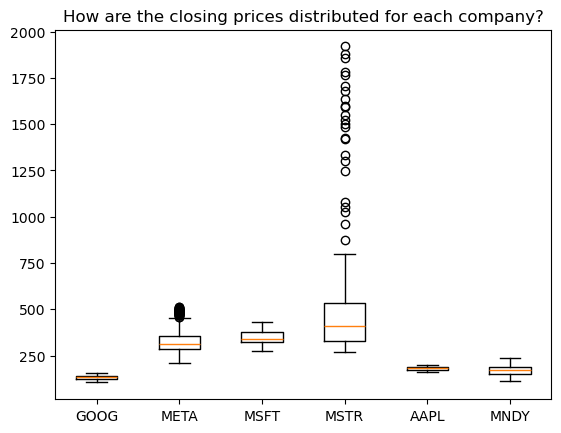

In [23]:
#Print box plot for each stock
fig, ax = plt.subplots()
ax.boxplot(data_close)
ax.set_xticklabels(data_close.keys())
plt.title("How are the closing prices distributed for each company?")

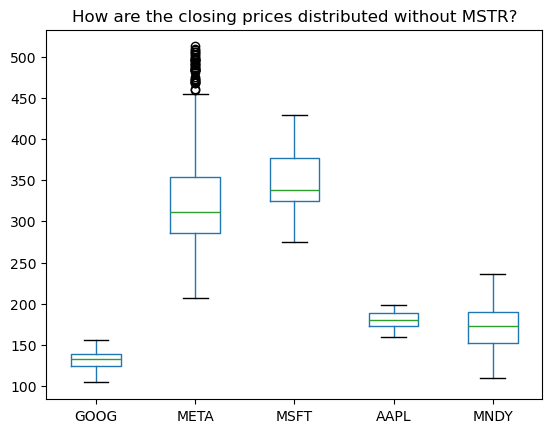

In [25]:
#Remove MSTR to better visualise data
data_close[["GOOG", "META", "MSFT", "AAPL", "MNDY"]].boxplot()
plt.title("How are the closing prices distributed without MSTR?")
plt.grid(False)

**Observation: The summary stats and boxplots show us that AAPL stock remains predictable with least std dev and least movement while MSTR shows max std dev and a lot of movement throughout the year, followed by META**

## Moving Averages

In [27]:
#Lets add the moving averages of the Stocks, for 10, 20 & 50 days to the data frames

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()

#Lets add the daily % change, Average Trade volume, Daily Change and Average Percent change of the stocks to the data frames
for company in company_list:
    company['Daily Percent Change'] = company['close'].pct_change()
    company['Average Trade Volume'] = company['volume'].mean()
    company['Daily Change'] = (company['close']-company['open'])
    company['Average Percent Change'] = company['Daily Percent Change'].mean()
    
#Test by checking a sample stock
AAPL_data.head(11)

,Unnamed: 0.1,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Percent Change,Average Trade Volume,Daily Change,Average Percent Change
0,0,0,0,249,AAPL,2023-04-03,164.270,166.2900,164.22,166.17,54893192.0,NaN,NaN,NaN,NaN,5.631651e+07,1.900,0.000166
1,1,1,1,248,AAPL,2023-04-04,166.595,166.8400,165.11,165.63,44435155.0,NaN,NaN,NaN,-0.003250,5.631651e+07,-0.965,0.000166
2,2,2,2,247,AAPL,2023-04-05,164.740,165.0500,161.80,163.76,51416166.0,NaN,NaN,NaN,-0.011290,5.631651e+07,-0.980,0.000166
3,3,3,3,246,AAPL,2023-04-06,162.430,164.9584,162.00,164.66,45390123.0,NaN,NaN,NaN,0.005496,5.631651e+07,2.230,0.000166
4,4,4,4,245,AAPL,2023-04-10,161.420,162.0300,160.08,162.03,47026287.0,NaN,NaN,NaN,-0.015972,5.631651e+07,0.610,0.000166
5,5,5,5,244,AAPL,2023-04-11,162.350,162.3600,160.51,160.80,46298026.0,NaN,NaN,NaN,-0.007591,5.631651e+07,-1.550,0.000166
6,6,6,6,243,AAPL,2023-04-12,161.220,162.0600,159.78,160.10,48348151.0,NaN,NaN,NaN,-0.004353,5.631651e+07,-1.120,0.000166
7,7,7,7,242,AAPL,2023-04-13,161.630,165.8000,161.42,165.56,67156588.0,NaN,NaN,NaN,0.034104,5.631651e+07,3.930,0.000166
8,8,8,8,241,AAPL,2023-04-14,164.590,166.3200,163.82,165.21,48081262.0,NaN,NaN,NaN,-0.002114,5.631651e+07,0.620,0.000166
9,9,9,9,240,AAPL,2023-04-17,165.090,165.3900,164.03,165.23,40713618.0,163.915,NaN,NaN,0.000121,5.631651e+07,0.140,0.000166


In [ ]:
#Lets remove the NaN values from each of the data frames
#for company in company_list:
   #company.fillna(0, inplace=True)

#Test by checking a sample stock
#AAPL_data.head(50)

## Closing Price Analysis

### Closing Price time series

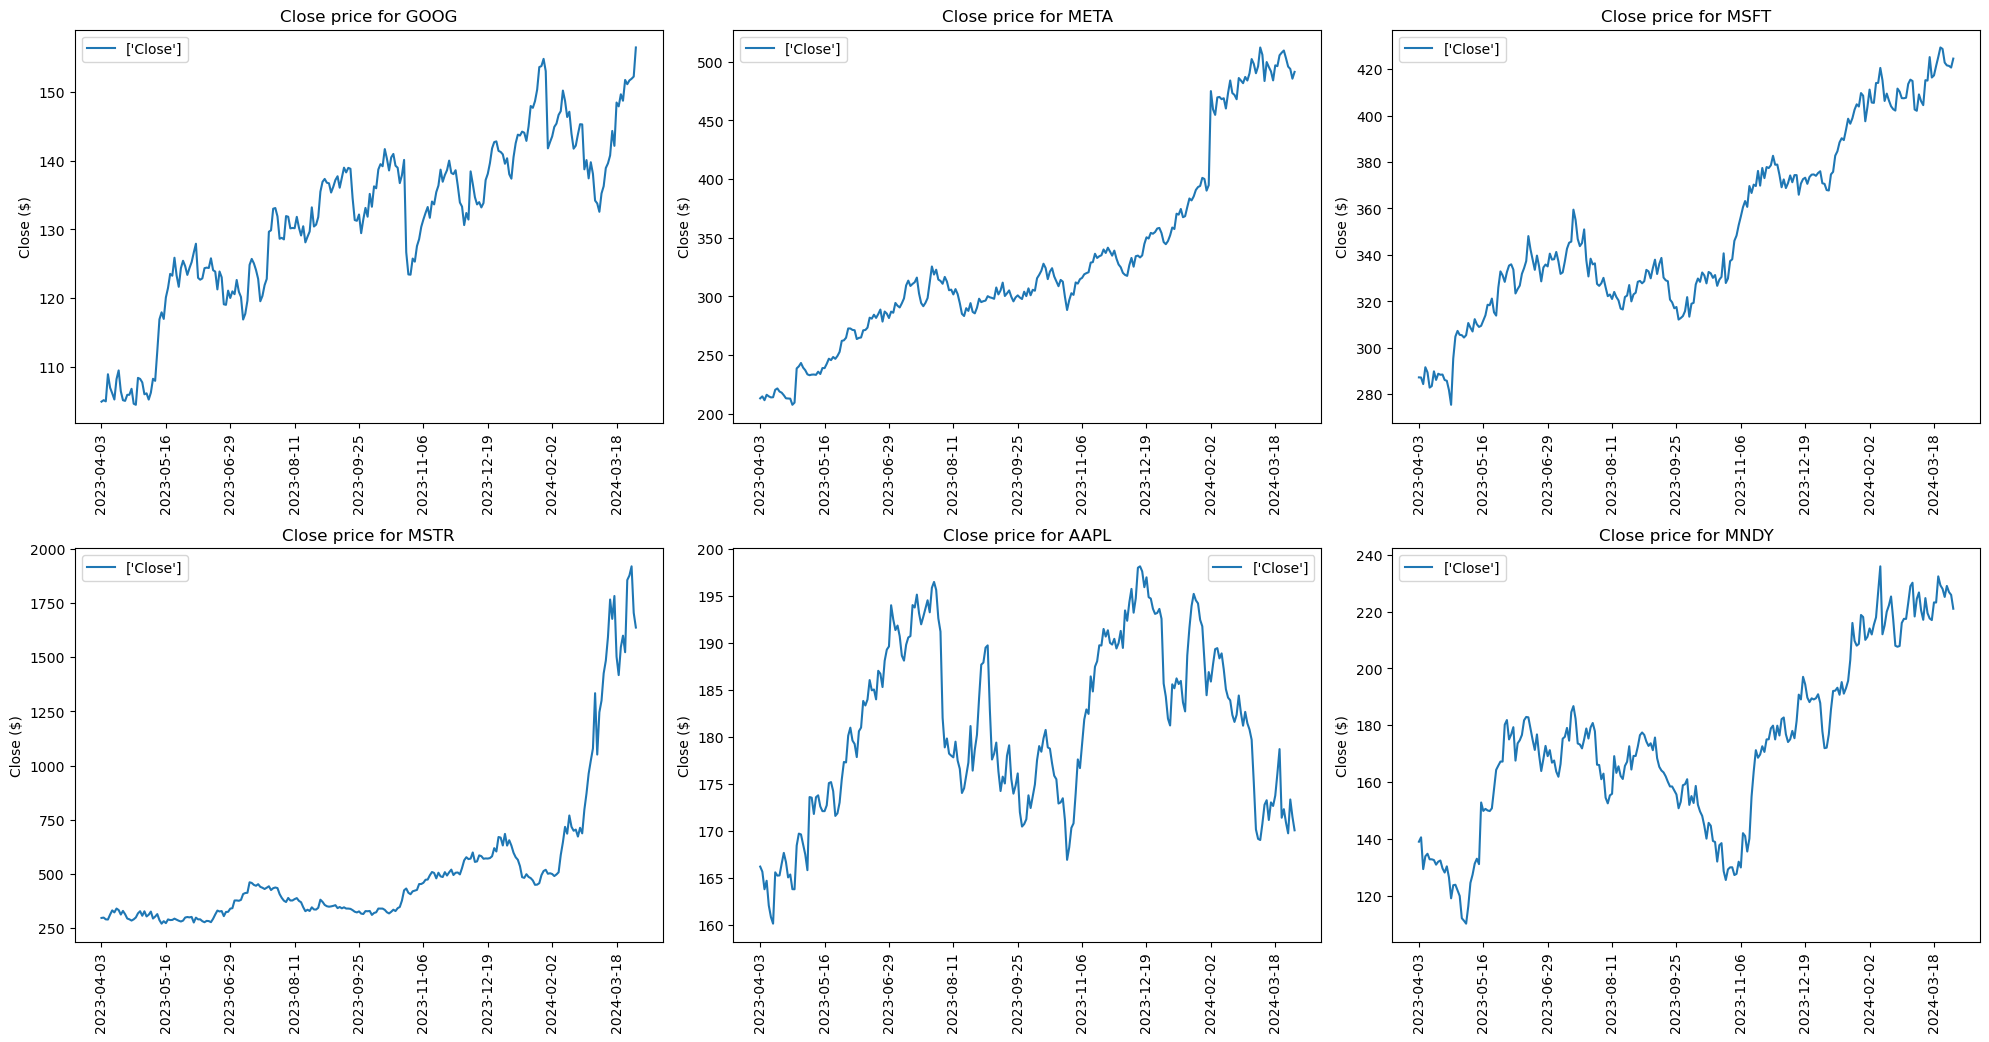

In [31]:
#Let's see a historical view of the closing price of each stock

plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    plt.plot(company['date'], company['close'],label=["Close"])
    plt.ylabel('Close ($)')
    plt.xlabel(None)
    plt.title(f"Close price for {company_name[i - 1]}")
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    plt.xticks(rotation=90)
    #plt.suptitle('Stock daily closing price')

#Save the plot
plt.savefig("output_data/Close price.png")
    
plt.tight_layout()

**Observation:**

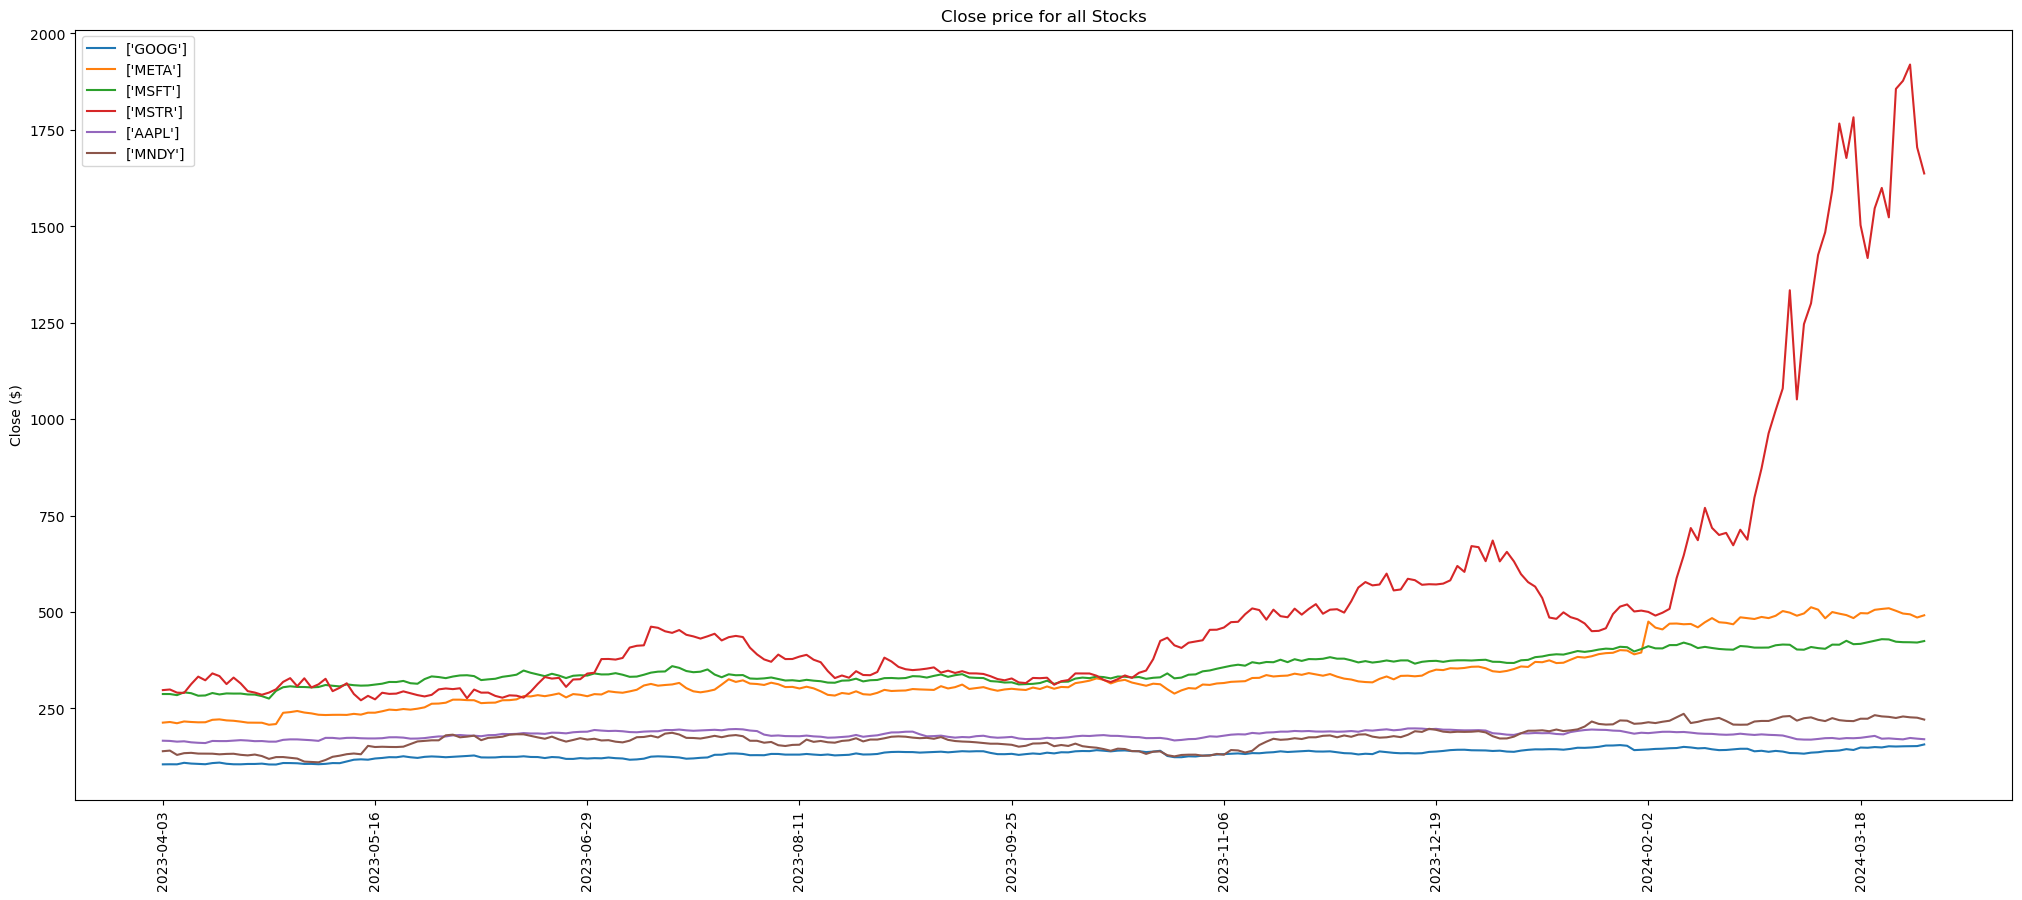

In [32]:
#Let's see a historical view of the closing price of each stock on single chart
plt.figure(figsize=(25, 10))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    #company['close'].plot()
    plt.plot(company['date'], company['close'],label=company["ticker"].unique())
    plt.ylabel('Close ($)')
    plt.title(f"Close price for all Stocks")
    plt.legend()
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    plt.xticks()

#Save the plot
plt.savefig("output_data/Close price for all stocks.png")

#plt.tight_layout()
plt.show()

**Observation**

In [34]:
#Create a dataframe with only 52W open, highest stock , lowest stock price, change and change percent price and max volume traded:
#Create empty list for values
company_52W_open = []
company_high = []
company_low = []
company_52W_close = []
company_maxvol = []
company_52W_change = []
company_52W_change_percent = []

for company in company_list:
    company_52W_open.append(company.iloc[0, 4])
    company_high.append(company["high"].max())
    company_low.append(company["low"].min())
    company_52W_close.append(company.iloc[249, 7])
    company_maxvol.append(company["volume"].max())
    company_52W_change.append((company.iloc[249, 7]) - (company.iloc[0, 4]))
    company_52W_change_percent.append((((company.iloc[249, 7]) - (company.iloc[0, 4])) / company.iloc[0,4])*100)

#lets create the new dataframe base on the 
stockprice_df = pd.DataFrame({"Company": company_name,
             "52W Open Stock Price": company_52W_open,
             "52W Highest Stock Price": company_high,
             "52W Lowest Stock Price": company_low,
             "52W Close Stock Price" : company_52W_close,
             "52W Stock Change ($)": company_52W_change,
             "52W Stock Change Percent (%)": company_52W_change_percent,
             "Max Volume": company_maxvol})

#Print the data frame
#stockprice_df.transpose() #If we needed the table is a rotated format
stockprice_df.head(10)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U4')) -> None

## Stock Volume Analysis

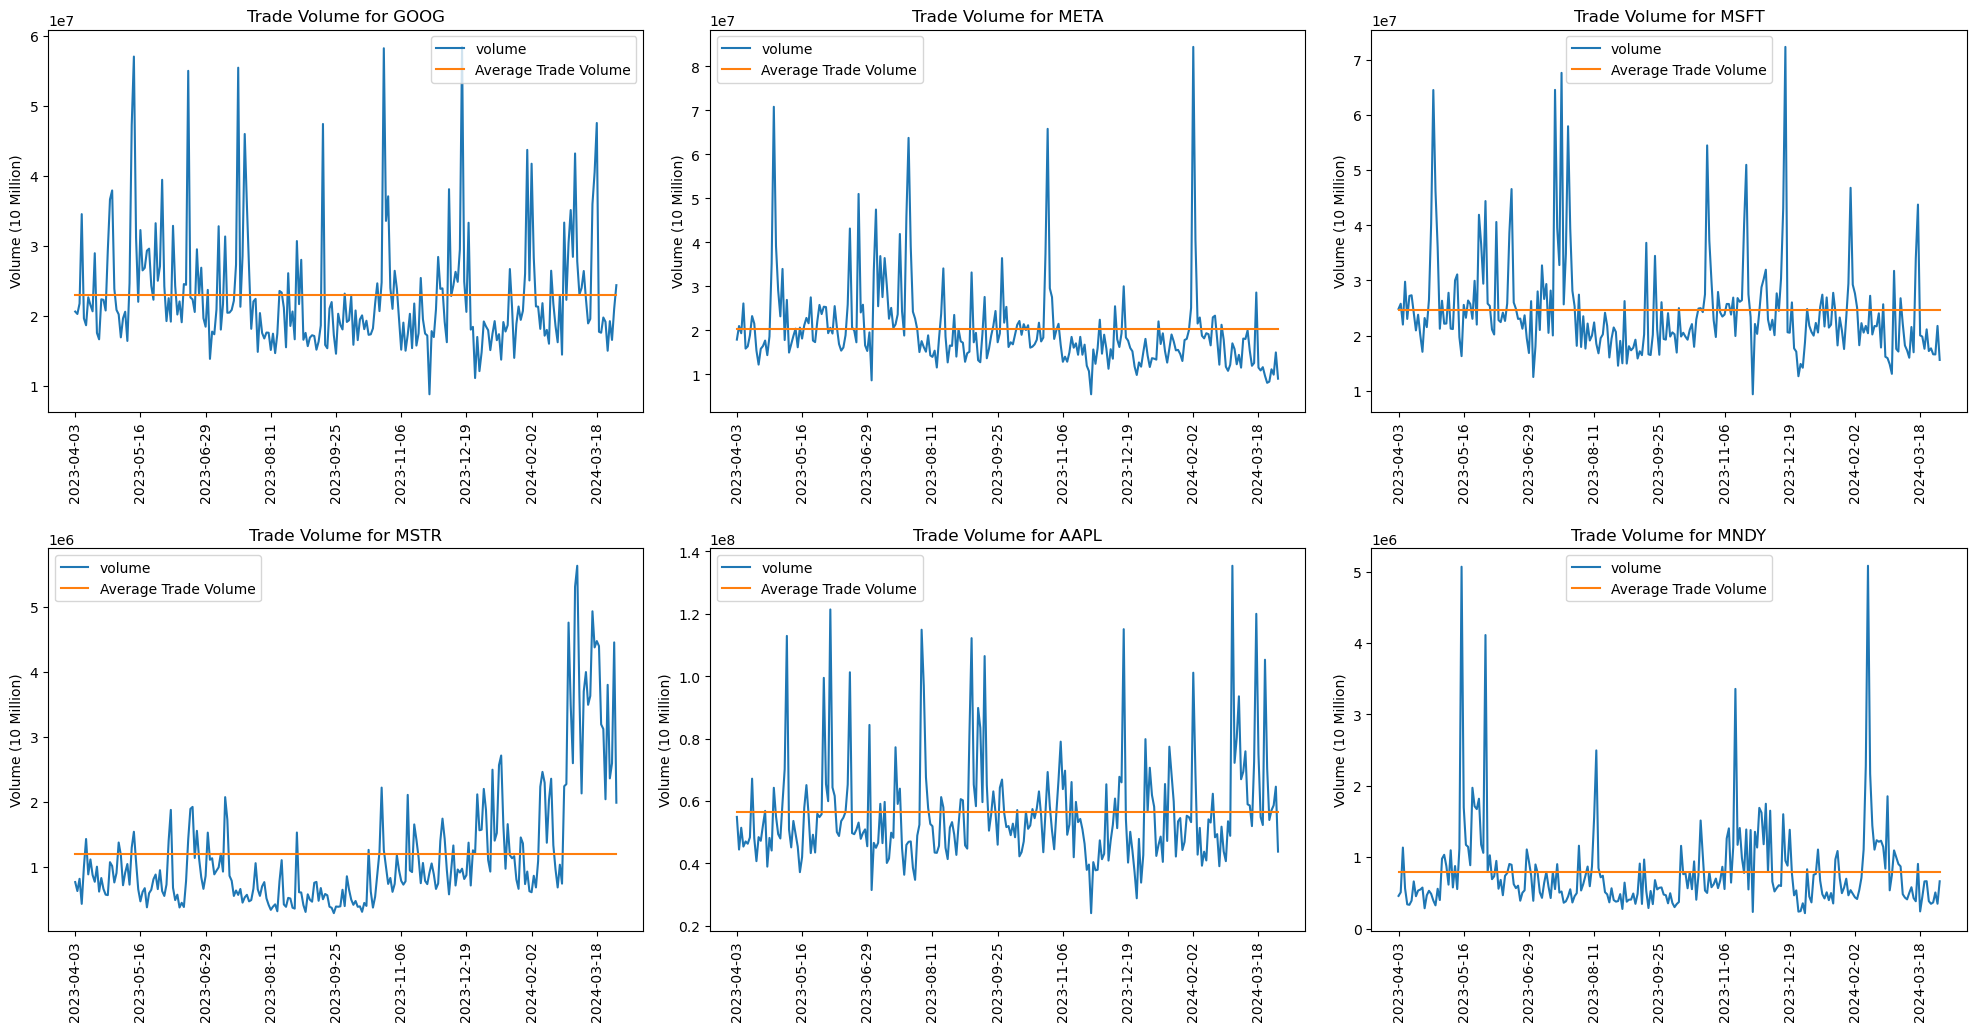

In [41]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    plt.plot(company['date'], company['volume'], company['Average Trade Volume'],label=["Volume"])
    plt.ylabel('Volume (10 Million)')
    plt.xlabel(None)
    plt.title(f"Trade Volume for {company_name[i - 1]}")
    plt.legend(company[['volume', 'Average Trade Volume']])
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

**Observation**

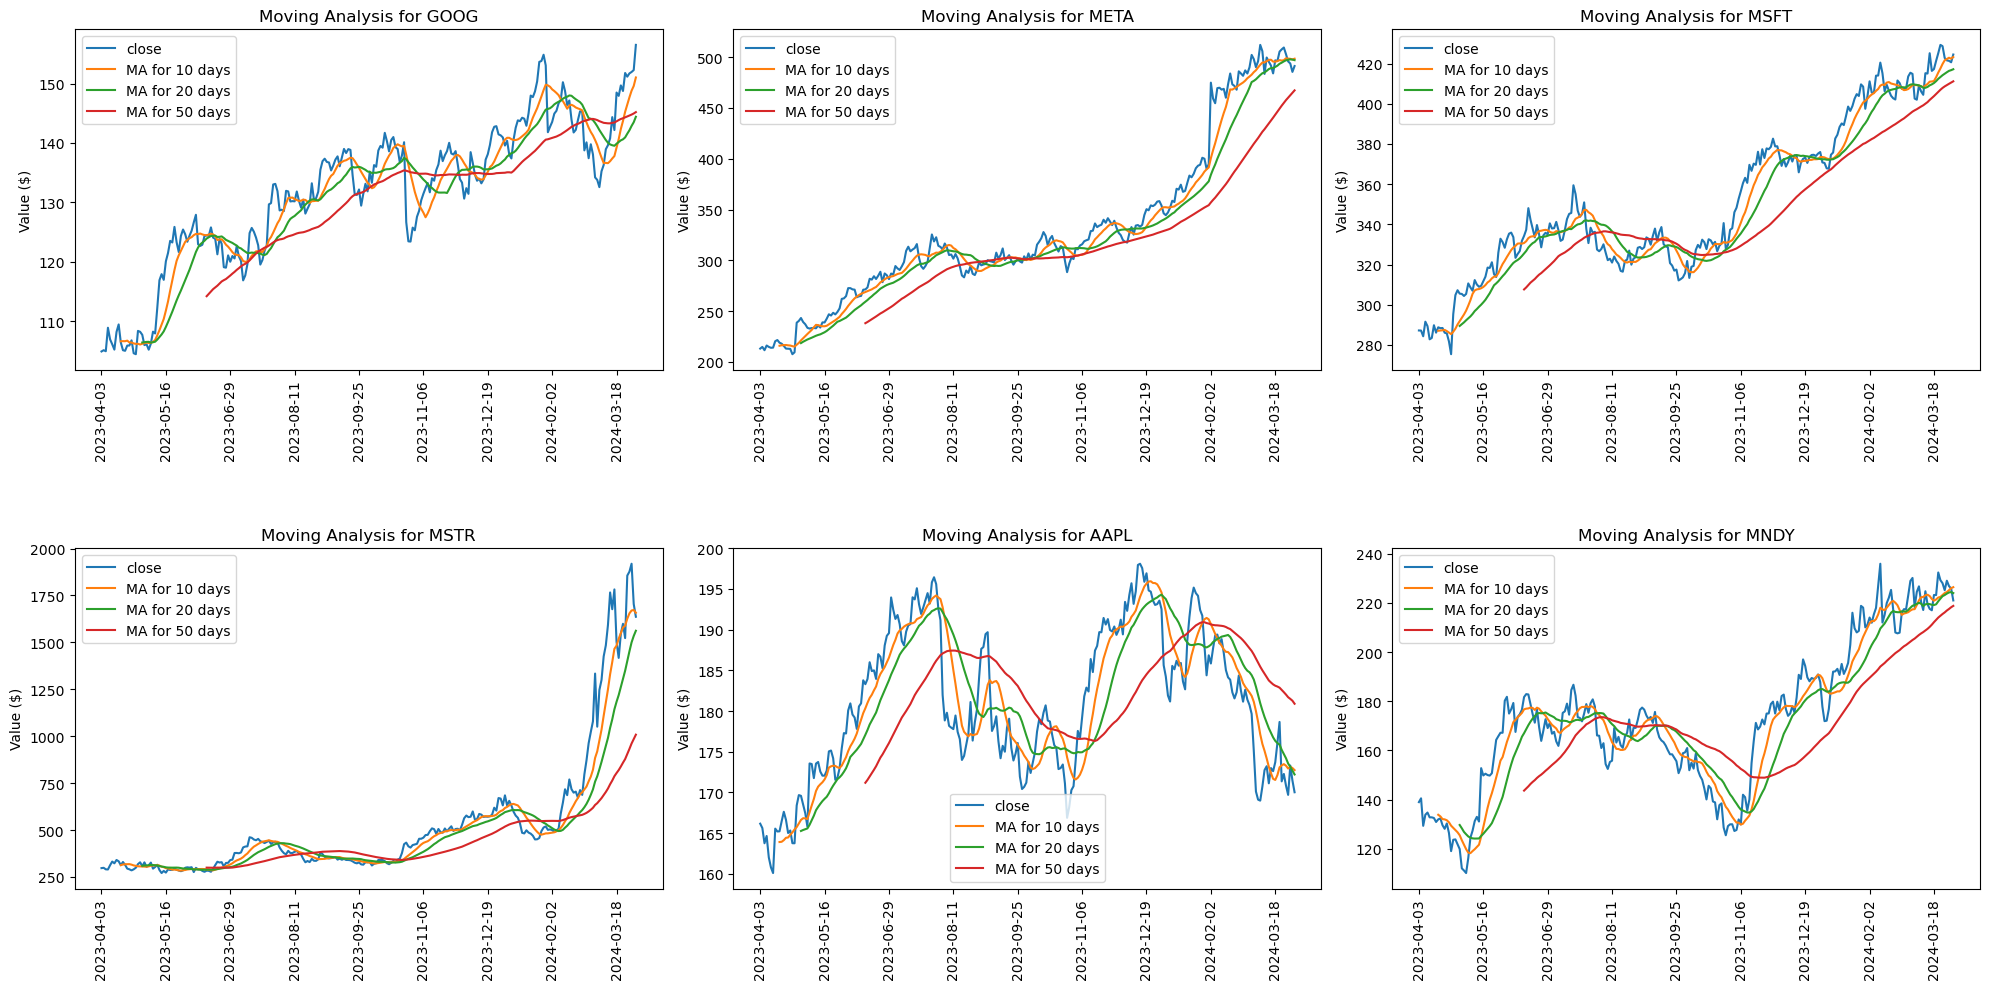

In [42]:
#Now let's plot the total Moving Average using 10, 20 & 50 days of stock
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    plt.plot(company['date'], company[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']])
    plt.ylabel('Value ($)')
    plt.xlabel(None)
    plt.title(f"Moving Analysis for {company_name[i - 1]}")
    plt.legend(company[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']])
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

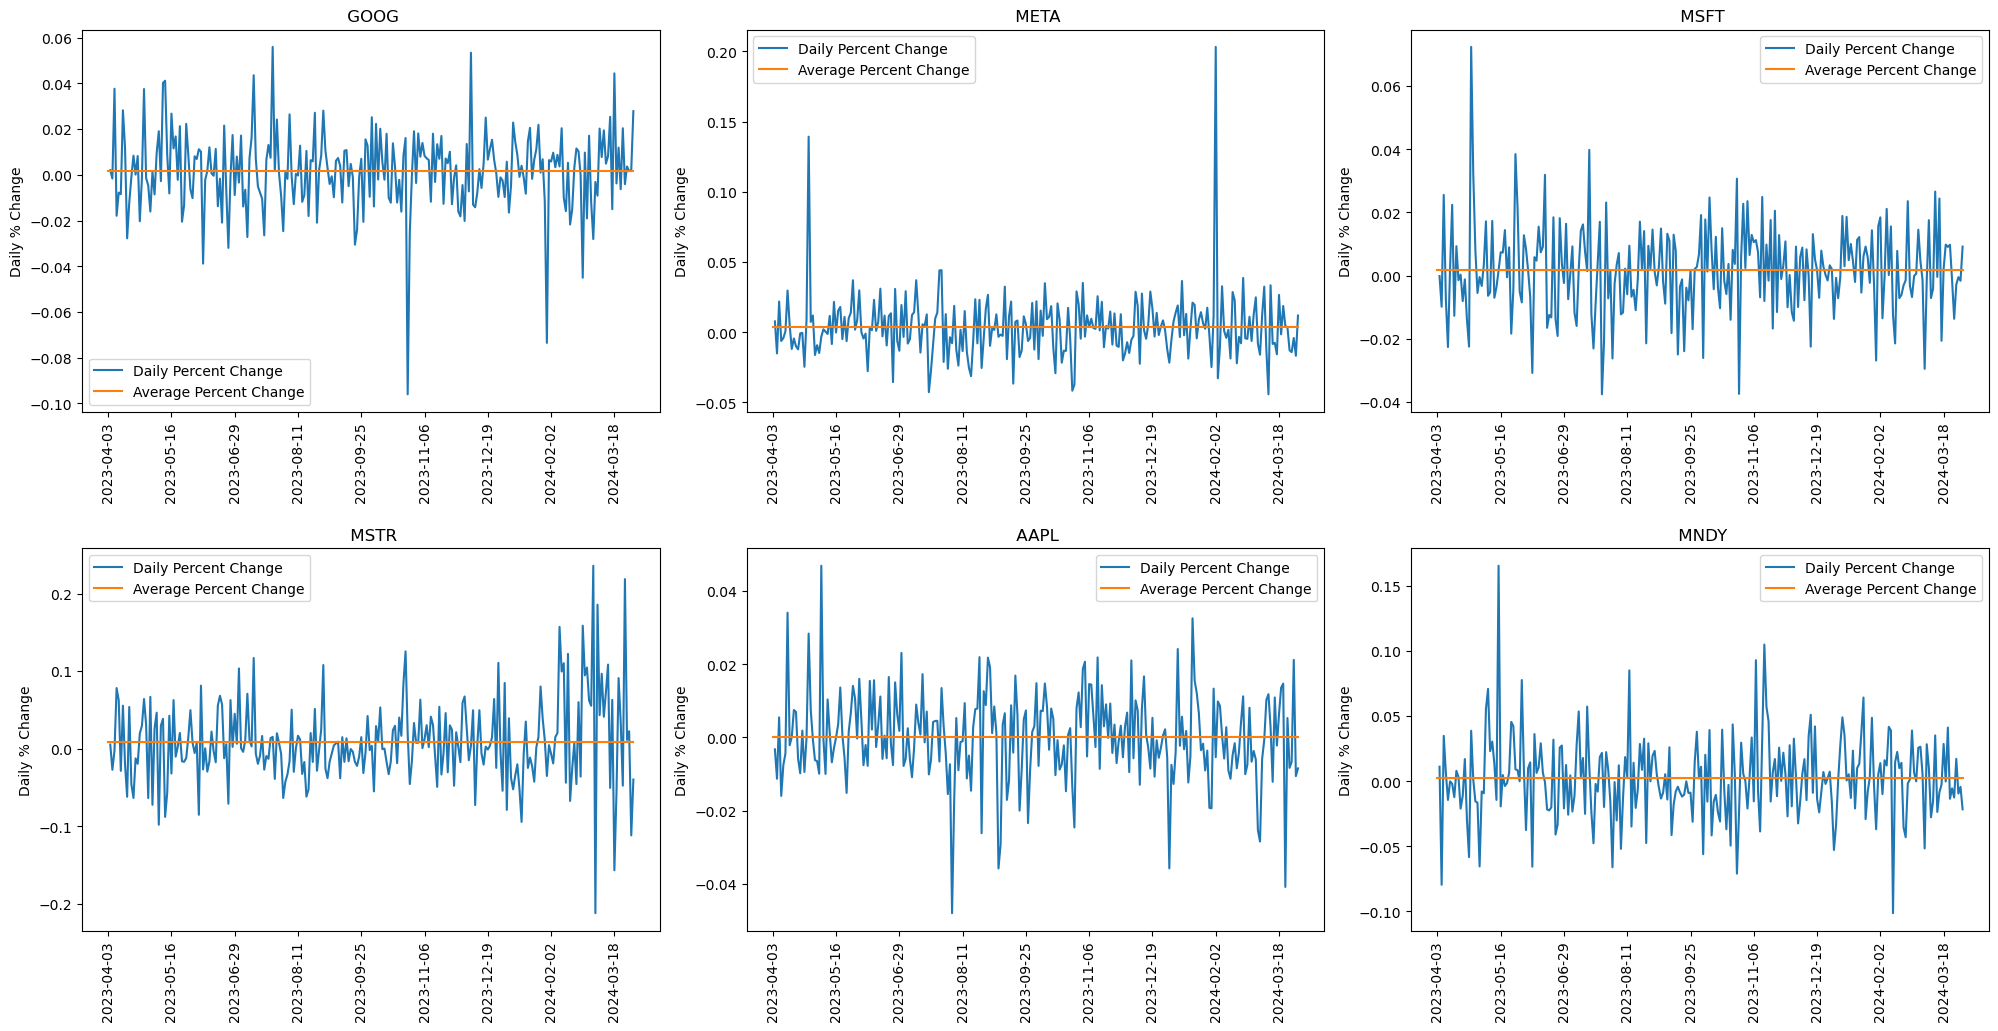

In [43]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 3, i)
    plt.plot(company['date'], company['Daily Percent Change'], company['Average Percent Change']) #, company['MA for 20 days'], company['MA for 50 days'])
    plt.ylabel('Daily % Change')
    plt.xlabel(None)
    plt.title(f" {company_name[i - 1]}")
    plt.legend(company[['Daily Percent Change', 'Average Percent Change']])
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    plt.xticks(rotation=90)
    
plt.tight_layout()
#plt.show()

In [44]:
#Create a dataframe with only highest stock price and volume traded:
company_high = []
company_maxvol = []
for company in company_list:
    company_high.append(company["high"].max())
    company_maxvol.append(company["volume"].max())

stockprice_volume_df = pd.DataFrame({"Company": company_name,
             "Highest Stock Price": company_high,
             "Max Volume": company_maxvol})
stockprice_volume_df

,Company,Highest Stock Price,Max Volume
0,GOOG,157.00,58456507.0
1,META,523.57,84391922.0
2,MSFT,430.82,72300798.0
3,MSTR,1999.99,5635349.0
4,AAPL,199.62,135399206.0
5,MNDY,239.22,5083390.0


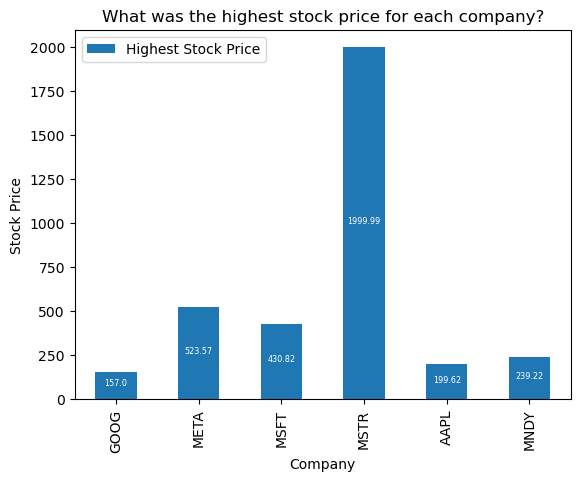

In [45]:
#Create a bar plot for highest stock price:

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha = 'center', color = 'white', fontsize = 'xx-small')

x = stockprice_volume_df["Company"]
y = stockprice_volume_df["Highest Stock Price"]

stockprice_volume_df.plot(kind = "bar", x = "Company", y = "Highest Stock Price")
plt.title("What was the highest stock price for each company?")
plt.ylabel("Stock Price")
addlabels(x,y)

plt.savefig("./output_data/stock_price_bar.png")
plt.show()

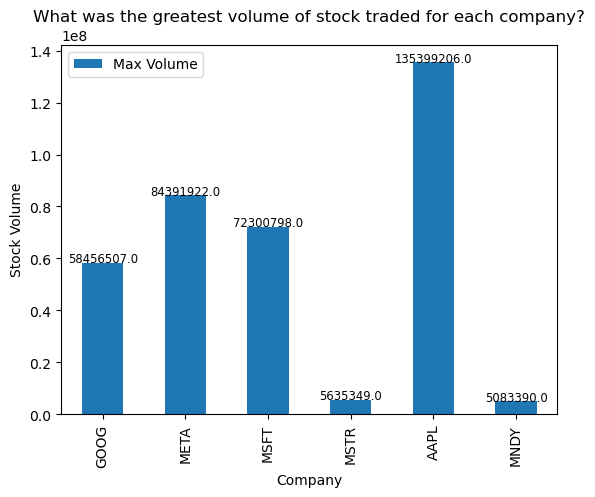

In [46]:
#Create a bar plot for greatest volume of stock traded:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', fontsize = 'small')
x = stockprice_volume_df["Company"]
y = stockprice_volume_df["Max Volume"]

stockprice_volume_df.plot(kind = "bar", x = "Company", y = "Max Volume")
plt.title("What was the greatest volume of stock traded for each company?")
plt.ylabel("Stock Volume")
addlabels(x,y)
plt.savefig("./output_data/stock_vol_bar.png")
plt.show()

In [47]:
#Create a dataframe with only lowest stock price and volume traded:
company_low = []
company_minvol = []
for company in company_list:
    company_low.append(company["low"].min())
    company_minvol.append(company["volume"].min())


stockprice_low_df = pd.DataFrame({"Company": company_name,
             "Lowest Stock Price": company_low,
             "Min Volume": company_minvol})
stockprice_low_df

,Company,Lowest Stock Price,Min Volume
0,GOOG,102.380,8827268.0
1,META,207.130,5462550.0
2,MSFT,275.370,9378315.0
3,MSTR,266.000,281782.0
4,AAPL,159.780,24042745.0
5,MNDY,108.345,215710.0


In [48]:
#Better visualising the stock volume

#Create bins
bins = [0, 30000000, 60000000, 90000000, 120000000, 150000000]
group_names = ["<30M", "30M - 60M", "60M-90M", "90M - 120M", "120M - 150M"]

#create a copy of the datasets
GOOG_data_copy = GOOG_data
META_data_copy = META_data
MSFT_data_copy = MSFT_data
MSTR_data_copy = MSTR_data
AAPL_data_copy = AAPL_data
MNDY_data_copy = MNDY_data

#Append a new column with bins for volume ranges:
GOOG_data_copy["Volume Ranges"] = pd.cut(GOOG_data_copy["volume"], bins, labels = group_names, include_lowest = True)
GOOG_data_copy

META_data_copy["Volume Ranges"] = pd.cut(META_data_copy["volume"], bins, labels = group_names, include_lowest = True)
META_data_copy

MSTR_data_copy["Volume Ranges"] = pd.cut(MSTR_data_copy["volume"], bins, labels = group_names, include_lowest = True)
MSTR_data_copy

MSFT_data_copy["Volume Ranges"] = pd.cut(MSFT_data_copy["volume"], bins, labels = group_names, include_lowest = True)
MSFT_data_copy

AAPL_data_copy["Volume Ranges"] = pd.cut(AAPL_data_copy["volume"], bins, labels = group_names, include_lowest = True)
AAPL_data_copy

MNDY_data_copy["Volume Ranges"] = pd.cut(MNDY_data_copy["volume"], bins, labels = group_names, include_lowest = True)
MNDY_data_copy

,Unnamed: 0.1,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Percent Change,Average Trade Volume,Daily Change,Average Percent Change,Volume Ranges
0,0,0,0,249,MNDY,2023-04-03,140.16,140.3900,135.395,138.99,457345.0,NaN,NaN,NaN,NaN,799180.716,-1.17,0.002349,<30M
1,1,1,1,248,MNDY,2023-04-04,140.00,141.8800,138.230,140.54,507530.0,NaN,NaN,NaN,0.011152,799180.716,0.54,0.002349,<30M
2,2,2,2,247,MNDY,2023-04-05,138.72,140.5100,127.300,129.36,1134847.0,NaN,NaN,NaN,-0.079550,799180.716,-9.36,0.002349,<30M
3,3,3,3,246,MNDY,2023-04-06,128.54,134.6200,124.310,133.87,562603.0,NaN,NaN,NaN,0.034864,799180.716,5.33,0.002349,<30M
4,4,4,4,245,MNDY,2023-04-10,132.09,134.7622,129.820,134.75,339035.0,NaN,NaN,NaN,0.006574,799180.716,2.66,0.002349,<30M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,245,4,MNDY,2024-03-25,231.12,231.1200,225.140,225.15,346903.0,223.994,223.1950,216.1308,-0.012500,799180.716,-5.97,0.002349,<30M
246,246,246,246,3,MNDY,2024-03-26,226.36,232.2400,225.000,229.02,365921.0,224.422,223.7740,216.8970,0.017189,799180.716,2.66,0.002349,<30M
247,247,247,247,2,MNDY,2024-03-27,230.86,231.3800,223.360,226.85,505653.0,225.163,224.2455,217.5302,-0.009475,799180.716,-4.01,0.002349,<30M
248,248,248,248,1,MNDY,2024-03-28,225.63,227.9100,223.110,225.87,347875.0,225.992,224.3885,218.2254,-0.004320,799180.716,0.24,0.002349,<30M


In [49]:
GOOG_volume = pd.DataFrame(GOOG_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"Google Volume"})
GOOG_volume

,Google Volume
Volume Ranges,
<30M,217
30M - 60M,33
60M-90M,0
90M - 120M,0
120M - 150M,0


In [50]:
#Repeat for other companies
META_volume = pd.DataFrame(META_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"META Volume"})

MSFT_volume = pd.DataFrame(MSFT_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"MSFT Volume"})

MSTR_volume = pd.DataFrame(MSTR_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"MSTR Volume"})

AAPL_volume = pd.DataFrame(AAPL_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"AAPL Volume"})

MNDY_volume = pd.DataFrame(MNDY_data_copy["Volume Ranges"].value_counts()).rename(columns = {"count":"MNDY Volume"})

In [51]:
company_volumes = pd.concat([GOOG_volume, META_volume, MSFT_volume, MSTR_volume, AAPL_volume, MNDY_volume], axis = 1)
company_volumes

,Google Volume,META Volume,MSFT Volume,MSTR Volume,AAPL Volume,MNDY Volume
Volume Ranges,,,,,,
<30M,217,228,215,250,2,250
30M - 60M,33,18,31,0,183,0
60M-90M,0,4,4,0,51,0
90M - 120M,0,0,0,0,12,0
120M - 150M,0,0,0,0,2,0


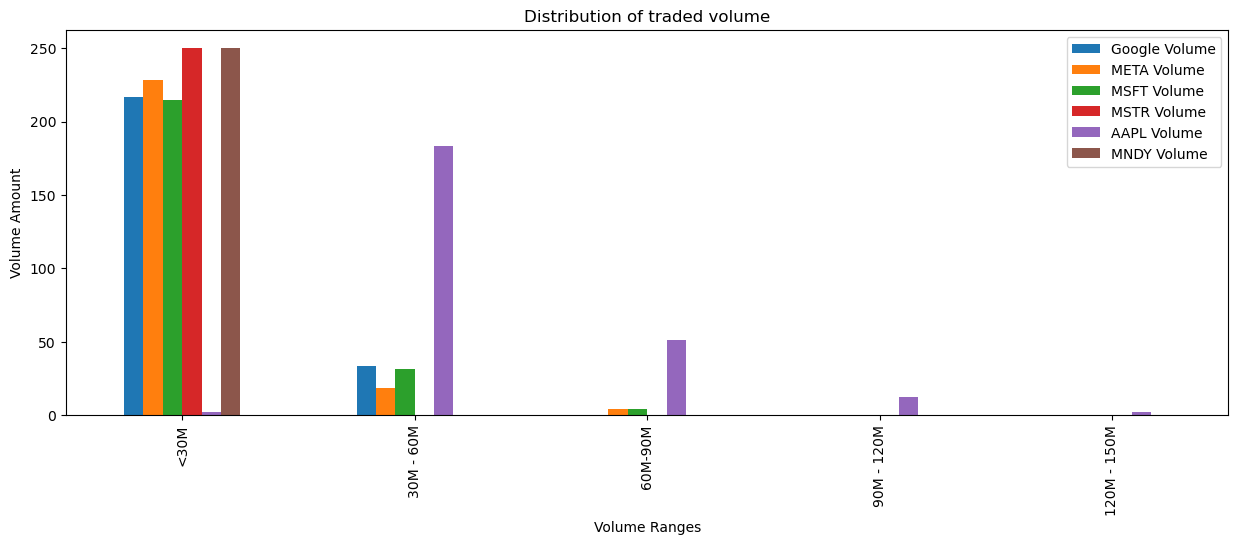

In [52]:
company_volumes.plot(kind='bar', figsize=(15, 5))
plt.ylabel("Volume Amount")
plt.title("Distribution of traded volume")
plt.savefig("./output_data/volume_ranges.png")
plt.show()

**Observation: Stock volumes for all companies except Apple reside in the <30M bin, while Apple stock is traded in much greater quantity and lies in 30-60M bin and beyond.**

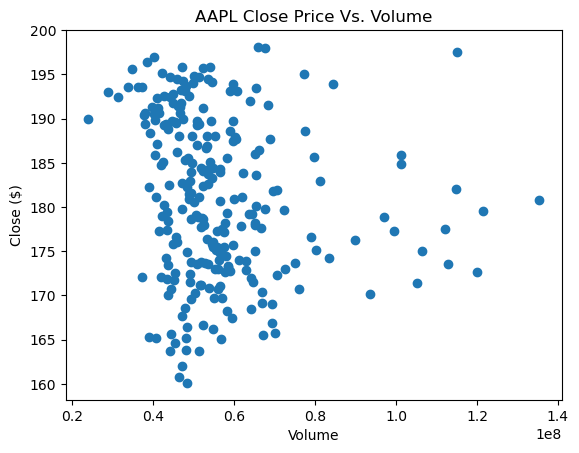

In [53]:
#Build scatter plot for AAPL Close v Volume
x_values = AAPL_data['volume']
y_values = AAPL_data['close']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Volume")
plt.ylabel("Close ($)")
plt.title("AAPL Close Price Vs. Volume")
#plt.grid()

#Save the figure
#plt.savefig("output_data/Fig1.png")

#Show plot
fig.tight_layout()

In [54]:
#Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
    regress_values = x_values * slope + intercept
    
    #print(regress_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    
    plt.title(f"AAPL Close Price - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = stpy.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

    return plt.plot(x_values,regress_values,"r-")

The r-squared is: 0.022414679875326696
The correlation between both factors is -0.15


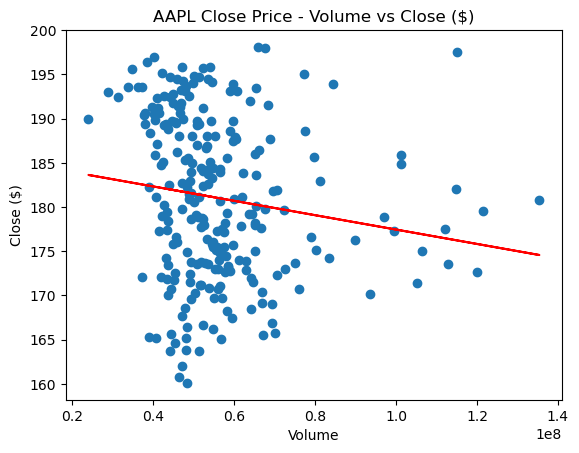

In [55]:
#Linear regression on AAPL
x_values = AAPL_data['volume']
y_values = AAPL_data['close']
createLinearRegressionPlot(x_values, y_values, "Volume", "Close ($)",(0, 0))